# Business Case: Scaler Clustering

## Introduction
Scaler is an online tech-versity offering intensive computer science & Data Science courses through live classes delivered by tech leaders and subject matter experts. The meticulously structured program enhances the skills of software professionals by offering a modern curriculum with exposure to the latest technologies. It is a product by InterviewBit.

## Objective
We are provided with the information for a segment of learners and tasked to cluster them on the basis of their job profile, company, and other features. Ideally, these clusters should have similar characteristics.
The objective is to perform clustering on the dataset and come up with the best algorithm.

### Dataset profile
- **Email_hash**- Anonymised Personal Identifiable Information (PII)<br>
- **Company_hash** - This represents an anonymized identifier for the company, which is the current employer of the learner.<br>
- **orgyear**- Employment start date<br>
- **CTC**- Current CTC<br>
- **Job_position**- Job profile in the company<br>
- **CTC_updated_year**: Year in which CTC got updated (Yearly increments, Promotions)<br>

In [1]:
# -- importing libraries --
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
import pickle
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
# -- importing dataset --
# the dataset has as unnamed column. we will remove it while reading the data
data = pd.read_csv('Data/scaler_clustering.csv').drop('Unnamed: 0', axis=1)
data.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


## Exploratory Data Analysis and Data Preprocessing

In [3]:
# info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   company_hash      205799 non-null  object 
 1   email_hash        205843 non-null  object 
 2   orgyear           205757 non-null  float64
 3   ctc               205843 non-null  int64  
 4   job_position      153279 non-null  object 
 5   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.4+ MB


In [4]:
# shape of the data
data.shape

(205843, 6)

In [5]:
# checking for missing values
data.isna().sum()

company_hash           44
email_hash              0
orgyear                86
ctc                     0
job_position        52564
ctc_updated_year        0
dtype: int64

In [6]:
# check duplicate values
print(data.duplicated().sum())
data = data.drop_duplicates().copy()

34


In [7]:
# descriptive statistics
data.describe(include='all')

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
count,205765,205809,205723.000000,2.058090e+05,153261,205809.000000
unique,37299,153443,NaN,NaN,1016,NaN
top,nvnv wgzohrnvzwj otqcxwto,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,NaN,NaN,Backend Engineer,NaN
freq,8337,10,NaN,NaN,43546,NaN
mean,NaN,NaN,2014.882264,2.271862e+06,NaN,2019.628272
std,NaN,NaN,63.576352,1.180187e+07,NaN,1.325187
min,NaN,NaN,0.000000,2.000000e+00,NaN,2015.000000
25%,NaN,NaN,2013.000000,5.300000e+05,NaN,2019.000000
50%,NaN,NaN,2016.000000,9.500000e+05,NaN,2020.000000
75%,NaN,NaN,2018.000000,1.700000e+06,NaN,2021.000000


#### Descriptive stats for the features

In [8]:
cat_cols = data.select_dtypes(include='object').columns
num_cols = data.select_dtypes(exclude='object').columns

In [9]:
# -- checking the distributions of the categorical variables --
for col in cat_cols:
    n = data[col].nunique()
    missing = data[col].isna().sum()
    mode = data[col].mode().values[0]
    mode_freq = data[col].value_counts().values[0]
    top_5 = data[col].value_counts().head(5)
    print(f'** Variable: {col} **')
    print(f'Number of unique values: {n}')
    print(f'Number of missing values: {missing}')
    print(f'Mode: {mode}')
    print(f'Mode frequency: {mode_freq}')
    print(f'Top 10 values: {top_5}')
    print('='*30)

** Variable: company_hash **
Number of unique values: 37299
Number of missing values: 44
Mode: nvnv wgzohrnvzwj otqcxwto
Mode frequency: 8337
Top 10 values: company_hash
nvnv wgzohrnvzwj otqcxwto    8337
xzegojo                      5381
vbvkgz                       3481
zgn vuurxwvmrt vwwghzn       3410
wgszxkvzn                    3240
Name: count, dtype: int64
** Variable: email_hash **
Number of unique values: 153443
Number of missing values: 0
Mode: bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b
Mode frequency: 10
Top 10 values: email_hash
bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b    10
3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94f1c88c5e15a6f31378     9
6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c     9
298528ce3160cc761e4dc37a07337ee2e0589df251d73645aae209b010210eee     9
c0eb129061675da412b0deb15871dd06ef0d7cd86eb5f7e8cc6a20b0d1938183     8
Name: count, dtype: int64
** Variable: job_position **
Number of unique valu

In [10]:
# -- checking the distributions of the categorical variables --
for col in num_cols:
    mean = data[col].mean()
    median = data[col].median()
    std = data[col].std()
    missing = data[col].isna().sum()
    min_val = data[col].min()
    max_val = data[col].max()
    q25 = data[col].quantile(0.25)
    q75 = data[col].quantile(0.75)
    print(f'** Variable: {col} **')
    print(f'Mean: {mean}')
    print(f'Standard Deviation: {std}')
    print(f'25th percentile: {q25}')
    print(f'Median: {median}')
    print(f'75th percentile: {q75}')
    print(f'Missing values: {missing}')
    print(f'Minimum value: {min_val}')
    print(f'Maximum value: {max_val}')
    print('='*30)


** Variable: orgyear **
Mean: 2014.882264015205
Standard Deviation: 63.57635238969608
25th percentile: 2013.0
Median: 2016.0
75th percentile: 2018.0
Missing values: 86
Minimum value: 0.0
Maximum value: 20165.0
** Variable: ctc **
Mean: 2271862.2562667327
Standard Deviation: 11801873.315718804
25th percentile: 530000.0
Median: 950000.0
75th percentile: 1700000.0
Missing values: 0
Minimum value: 2
Maximum value: 1000150000
** Variable: ctc_updated_year **
Mean: 2019.6282718442828
Standard Deviation: 1.3251874988292973
25th percentile: 2019.0
Median: 2020.0
75th percentile: 2021.0
Missing values: 0
Minimum value: 2015.0
Maximum value: 2021.0


#### Treating missing values

In [11]:
# job position has a lot of missing values, but there is a category named 'Other' so we will replace the missing values with 'Other'
data['job_position'] = data['job_position'].fillna('Other').copy()

# since company hash has a low number of missing values, we will use the mode impution through sklearn simple imputer
mode_imputer = SimpleImputer(strategy='most_frequent')
data[['company_hash']] = mode_imputer.fit_transform(data[['company_hash']])

# org year also has a low number of missing values, so we will use the mode impution through sklearn knn imputer since it is a numeric value
knn_imputer = KNNImputer(n_neighbors=5)
data['orgyear'] = knn_imputer.fit_transform(data[['orgyear']])

#### Outlier removal

In [12]:
# removing the outliers using the IQR method with a threshold of 3
def remove_outliers(data, columns, threshold=1.5):
    n_rows_before = data.shape[0]
    print(f'Number of rows before removing outliers: {n_rows_before}')
    for col in columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - threshold*iqr
        upper_bound = q3 + threshold*iqr
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    n_rows_after = data.shape[0]
    print(f'Number of rows after removing outliers: {n_rows_after}')
    print(f'Percentage of rows removed: {((n_rows_before - n_rows_after)/n_rows_before)*100:.2f}%')
    return data
data = remove_outliers(data, num_cols, 3)

Number of rows before removing outliers: 205809
Number of rows after removing outliers: 199643
Percentage of rows removed: 3.00%


#### Feature engineering

In [13]:
# adding a new column for years of experience
data['years_of_experience'] = 2024 - data['orgyear']
# adding a new column for last incremental
data['years_since_last_increment'] = 2024 - data['ctc_updated_year']

# now we do not need the org year and ctc updated year columns
data = data.drop(['orgyear', 'ctc_updated_year'], axis=1)

# we need to convert company_hash to a vector. We will use descriptive statistics for this by calculating the mean, median, min, max and count of occurrences of the company
company_has_vector = data.groupby('company_hash')['ctc'].agg(company_ctc_mean='mean', company_ctc_median='median', company_ctc_min='min', company_ctc_max='max', company_ctc_count='count').reset_index()
data = pd.merge(data, company_has_vector, on='company_hash', how='left')

# we will do the same thing for the job position, but job position changes behaviour based on the company so we will use the company hash as well
job_position_vector = data.groupby(['company_hash', 'job_position'])['ctc'].agg(job_ctc_mean='mean', job_ctc_median='median', job_ctc_min='min', job_ctc_max='max', job_ctc_count='count').reset_index()
data = pd.merge(data, job_position_vector, on=['company_hash', 'job_position'], how='left')

# creating flags for employess based on company and job position ctc means
data['above_company_ctc_mean'] = data['ctc'] > data['company_ctc_mean']
data['above_job_ctc_mean'] = data['ctc'] > data['job_ctc_mean']

In [14]:
data.head()

,company_hash,email_hash,ctc,job_position,years_of_experience,years_since_last_increment,company_ctc_mean,company_ctc_median,company_ctc_min,company_ctc_max,company_ctc_count,job_ctc_mean,job_ctc_median,job_ctc_min,job_ctc_max,job_ctc_count,above_company_ctc_mean,above_job_ctc_mean
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,1100000,Other,8.0,4.0,1.115667e+06,1070000.0,500000,1771000,9,1.085000e+06,1085000.0,1070000,1100000,2,False,True
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,449999,FullStack Engineer,6.0,5.0,1.134069e+06,890000.0,10000,4100000,420,9.511363e+05,800000.0,300000,2000000,22,False,False
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2000000,Backend Engineer,9.0,4.0,2.000000e+06,2000000.0,2000000,2000000,1,2.000000e+06,2000000.0,2000000,2000000,1,False,False
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,700000,Backend Engineer,7.0,5.0,1.713929e+06,1400000.0,200000,4700000,70,1.500000e+06,1540000.0,520000,3500000,25,False,False
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,1400000,FullStack Engineer,7.0,5.0,9.400000e+05,850000.0,540000,1400000,6,8.466667e+05,600000.0,540000,1400000,3,True,True


>**The company names are hashed, hence there is nothing to clean using regex in company_hash column**

> #### Observations
> - The datatypes are correct
> - There are 205843 rows in the data with 6 columns
> - Some columns had null values, which we treated
> - There were 34 duplicates in the dataset which were removed
> - There were some unusual values, for example, the orgyear was 0 in some cases, which were removed in outlier removal
> - IQR technique was used for outlier removal
> - Missing values were treated, using existing value, mode and kNN imputes
> - Many useful features were engineered

## Manual clustering

In [15]:
cat_cols = data.select_dtypes(include='object').columns
num_cols = data.select_dtypes(exclude='object').columns

### Univariate analysis

In [ ]:
def plot_hist_box(data, num_cols, save_fig=False, fig_name='plt.png'):
    cols = 2
    rows = len(num_cols)
    fig, ax = plt.subplots(rows, cols, figsize=(8, 3*rows))
    for i, col in enumerate(num_cols):
        sns.histplot(data[col], kde=True, ax=ax[i, 0], bins=20)
        ax[i//cols, i%cols].set_title(f'{col} Distribution')
        sns.boxplot(data[col], ax=ax[i, 1])
    plt.tight_layout()
    plt.show()
    if save_fig:
        fig.savefig(fig_name)


plot_hist_box(data, num_cols, save_fig=True, fig_name='Media/num_cols_dist.png')


> **Note: The output was too big, hence it is uploaded as a separate image named num_cols_dist.png**

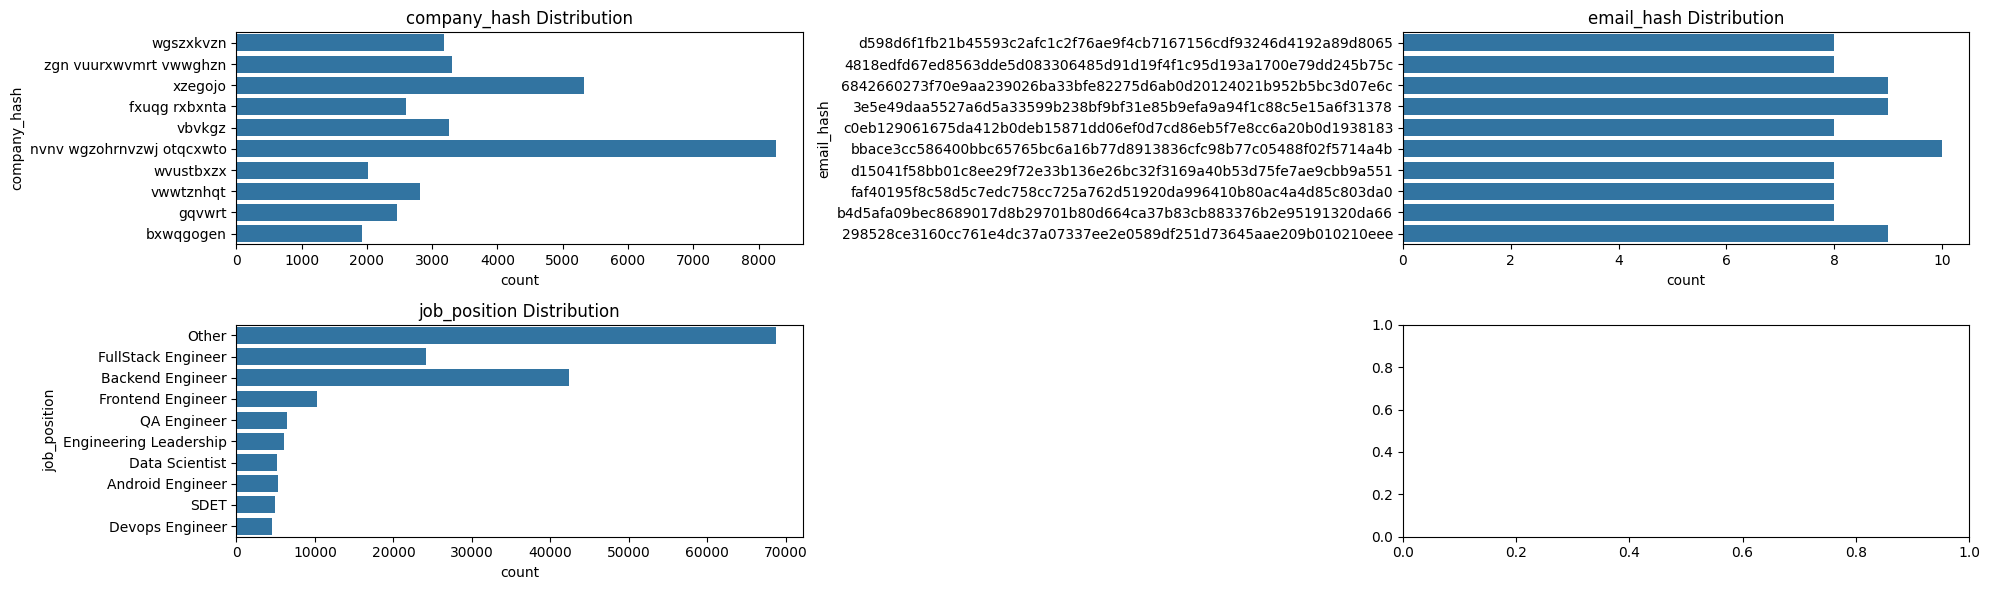

In [17]:
# write a function to plot countplots for categorical variables
def plot_countplots(data, cat_cols, save_fig=False, fig_name='plt.png'):
    cols = 2
    rows = len(cat_cols)//cols + len(cat_cols)%cols
    fig, ax = plt.subplots(rows, cols, figsize=(20, 3*rows))
    for i, col in enumerate(cat_cols):
        df = data.loc[data[col].isin(data[col].value_counts().head(10).index)]
        sns.countplot(df[col], ax=ax[i//cols, i%cols])
        ax[i//cols, i%cols].set_title(f'{col} Distribution')
        sns.countplot()
    plt.tight_layout()
    plt.show()
    if save_fig:
        fig.savefig(fig_name)
plot_countplots(data, cat_cols, save_fig=True, fig_name='Media/cat_cols_dist.png')

### Bivariate analysis

In [ ]:
# plot a pairplot for all the variables in the dataset, alse save the plot as an image
sns.pairplot(data[num_cols])
plt.show()
plt.savefig('Media/pairplot.png')

> **Note:The output was to big, hence it is uploaded as an image separately named pairplot.png**

> #### Observations
> - The numeric features do not show any tendency of clusters, except for years_since_last_increment which can be divided based on each year.
> - The tiers above_company_ctc_mean and above_job_ctc_mean can be useful to cluster two groups each
> - Some of the companies have very high count of employees, which can be used to cluster the companies.
> - Job position has mostly engineering designation which occurs most frequently, more information would be need to cluster based on this feature.
> - A relationship can be seen between the features company_ctc_mean and company_ctc_median which is expected.
> - There is no observable relationship between other features

## Clustering

#### Pre processing data for clustering

In [18]:
# defining columns to use for clustering
# we will remove all categorical columns since we have already performed the encoding
cols = [
    'ctc', 'years_of_experience', 'years_since_last_increment', 'company_ctc_mean', 'company_ctc_median', 'company_ctc_min', 
    'company_ctc_max', 'company_ctc_count', 'job_ctc_mean', 'job_ctc_median', 'job_ctc_min', 'job_ctc_max', 'job_ctc_count'
]

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
training_data = data[cols].copy()
training_data = scaler.fit_transform(training_data)

In [20]:
# # we will also apply PCA to reduce the number of dimensions to visualize the clusters
# from sklearn.decomposition import PCA
# pca = PCA(n_components=2)
# pca_data = pca.fit_transform(training_data)

# # we will also apply tsne for visualization
# from sklearn.manifold import TSNE
# tsne = TSNE(n_components=2)
# tsne_data = tsne.fit_transform(training_data)

In [21]:
# # saving the pca and tsne data as a pickle file since it takes a lot of time to compute
# with open('Data/pca_data.pkl', 'wb') as f:
#     pickle.dump(pca_data, f)
# with open('Data/tsne_data.pkl', 'wb') as f:
#     pickle.dump(tsne_data, f)

In [22]:
# loading the pca and tsne data
with open('Data/pca_data.pkl', 'rb') as f:
    pca_data = pickle.load(f)
with open('Data/tsne_data.pkl', 'rb') as f:
    tsne_data = pickle.load(f)

In [23]:
# we will initialize an emptly dictionary which will have the cluster predictions from each model that we will use
cluster_predictions = {}

### K-means clustering

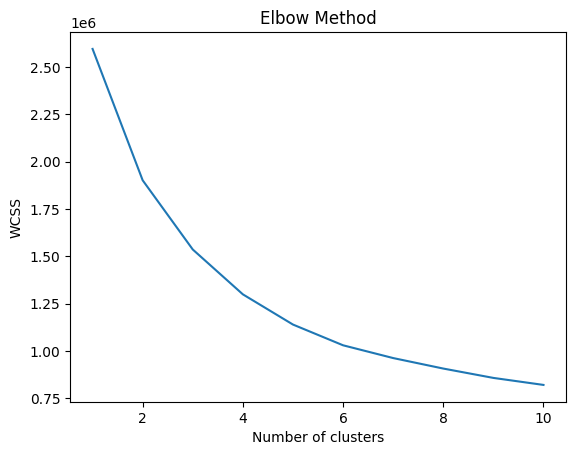

In [24]:
# we need to find the optimal number of clusters, and will use the elbow method for this
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(training_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [25]:
# based on the plot above, we will use 6 clusters and retrain the model
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)
kmeans.fit(training_data)
cluster_predictions['kmeans'] = kmeans.predict(training_data)
del(kmeans)

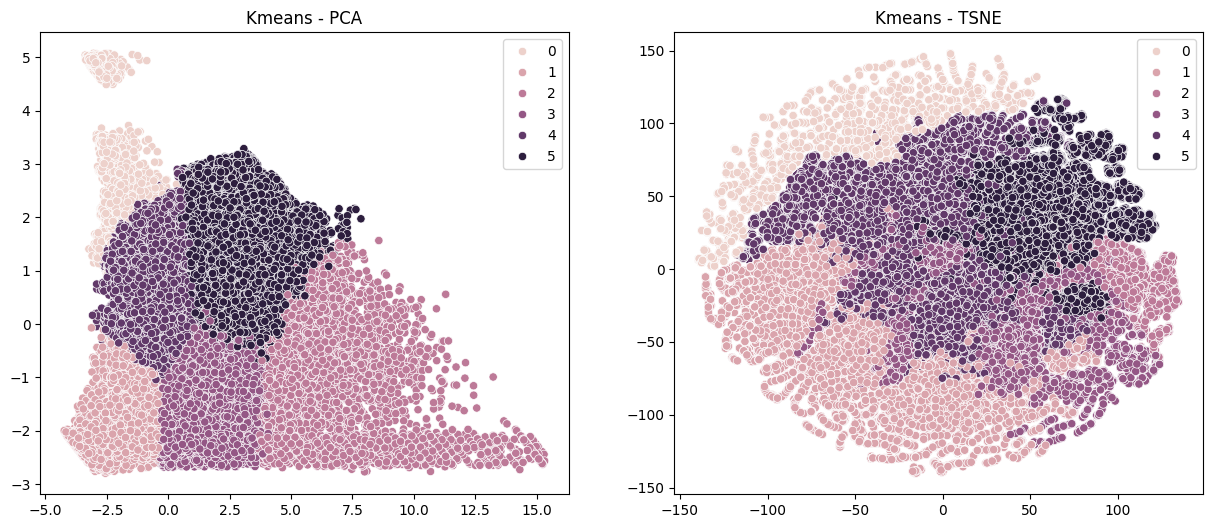

In [26]:
# visualize predictions using pca and tsne, to check how the clusters are formed
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=cluster_predictions['kmeans'], ax=ax[0])
ax[0].set_title('Kmeans - PCA')
sns.scatterplot(x=tsne_data[:, 0], y=tsne_data[:, 1], hue=cluster_predictions['kmeans'], ax=ax[1])
ax[1].set_title('Kmeans - TSNE')
plt.show()

### Gaussian mixture models

In [27]:
# next we will use Gaussian Mixture Model
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4, random_state=42)
cluster_predictions['gmm'] = gmm.fit_predict(training_data)
del(gmm)

### DBSCAN

In [28]:
# next we will use DBSCAN
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
cluster_predictions['dbscan'] = dbscan.fit_predict(training_data)
del(dbscan)

#### Visualizing the results

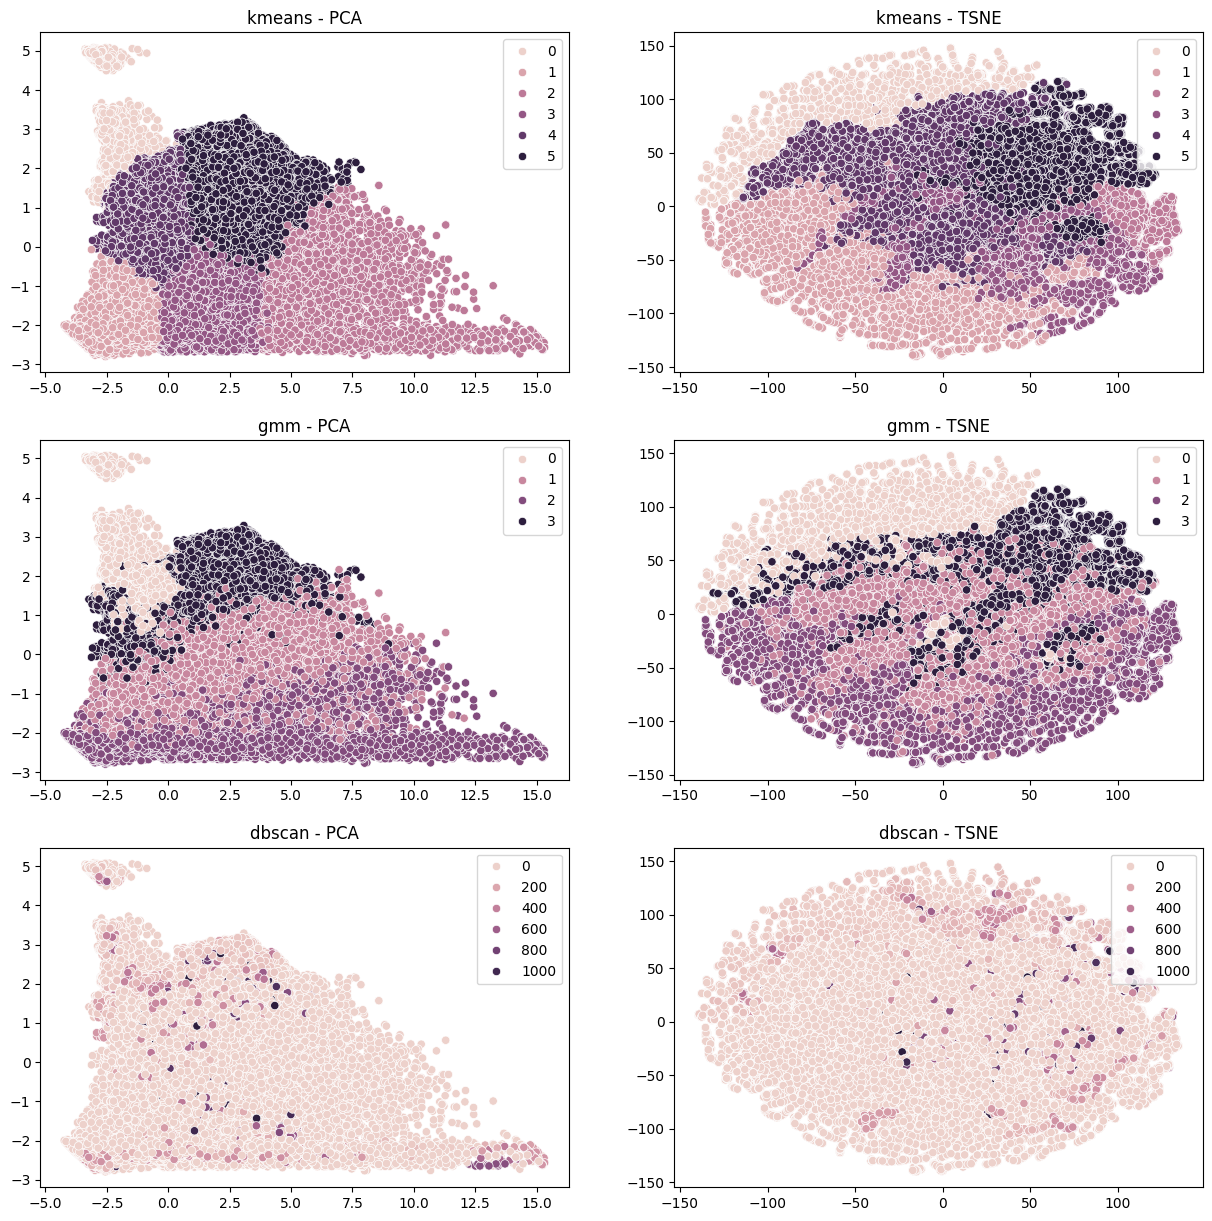

In [29]:
# plot the clusters for each prediction in cluster_predictions, both on the pca and tsne data
fig, ax = plt.subplots(3, 2, figsize=(15, 15))
for i, (key, value) in enumerate(cluster_predictions.items()):
    sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=value, ax=ax[i, 0])
    ax[i, 0].set_title(f'{key} - PCA')
    sns.scatterplot(x=tsne_data[:, 0], y=tsne_data[:, 1], hue=value, ax=ax[i, 1])
    ax[i, 1].set_title(f'{key} - TSNE')
plt.show()

### Agglomerative clustering

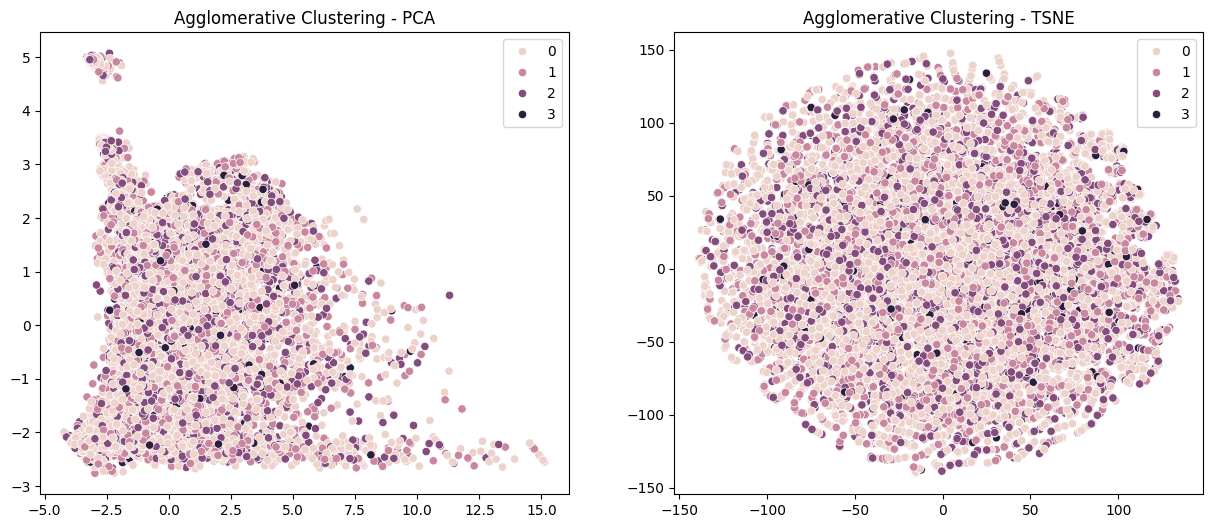

In [30]:
# next we will use hierarchical clustering (aggolomerative clustering)
# we will sample the dataset since it takes a lot of time and resources to compute

np.random.seed(42)
frac = 0.1
sample_training_data = training_data[np.random.choice(training_data.shape[0], int(training_data.shape[0]*frac), replace=False)]
sample_pca_data = pca_data[np.random.choice(pca_data.shape[0], int(pca_data.shape[0]*frac), replace=False)]
sample_tsne_data = tsne_data[np.random.choice(tsne_data.shape[0], int(tsne_data.shape[0]*frac), replace=False)]

from sklearn.cluster import AgglomerativeClustering
agg_clustering = AgglomerativeClustering(n_clusters=4, linkage='ward')
agg_predictions = agg_clustering.fit_predict(sample_training_data)
del(agg_clustering)

# visualize the cluster predictions from the aggolomerative clustering
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.scatterplot(x=sample_pca_data[:, 0], y=sample_pca_data[:, 1], hue=agg_predictions, ax=ax[0])
ax[0].set_title('Agglomerative Clustering - PCA')
sns.scatterplot(x=sample_tsne_data[:, 0], y=sample_tsne_data[:, 1], hue=agg_predictions, ax=ax[1])
ax[1].set_title('Agglomerative Clustering - TSNE')
plt.show()

> ## Observations and conclusions
> - PCA and tSNE both were used to visualise the data in 2-dimensions
> - The data was scaled before fitting the models
> - Based on elbow method, the best number of clusters were 6
> - By seeing the reduced data, it is not evident that the data is distributed into 6 clusters.
> - Seems like a one big cluster which cannot be separated into smaller ones
> - Out of all the algorithms, the output from k-means and GMM seems to be the best